In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter  # Import for custom tick formatting
import seaborn as sns

def plot_feature_predictive_power(dataframe, feature, target, n_quantiles=20, categorical=False):
    """
    Plots the predictive power of a feature by dividing it into quantiles 
    and computing the average target value for each quantile.
    
    Args:
        df: DataFrame containing the feature and target data.
        feature: The feature name (string) to investigate.
        target: The target variable name (string).
        n_quantiles: Number of quantiles to divide the feature into.
        categorical: Whether the feature is categorical or continuous
    """
    df = dataframe.copy()

    # Create quantile-based groups
    if categorical:
        df['quantile'] = df[feature]
    else:
        df['quantile'] = pd.qcut(df[feature], q=n_quantiles, duplicates='drop')
    
    # Group by quantiles and calculate mean target value
    quantile_means = round(df.groupby('quantile')[target].mean()*100, 2)
    quantile_means = quantile_means.reset_index()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=quantile_means.index, y=quantile_means[target], marker='o')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0f}%"))

    if categorical:
        plt.xlabel('Categories')
        plt.xticks(ticks=np.arange(len(quantile_means)), labels=quantile_means['quantile'].astype(str))
    else:
        plt.xlabel('Quantiles')
        plt.xticks(ticks=np.arange(len(quantile_means)), labels=quantile_means['quantile'].astype(str), rotation=45)
        
    plt.ylabel('Percentage of Fraud Defaults')
    plt.title(f'Predictive Power of {feature}')
    plt.tight_layout()
    plt.show()

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("synthetic_fraud_dataset.csv")
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [4]:
df.shape

(50000, 21)

In [5]:
df.drop(columns=["Transaction_ID",	"User_ID",	"Timestamp"], inplace=True)

In [6]:
df.isna().sum()

Transaction_Amount              0
Transaction_Type                0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [7]:
df.describe()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [8]:
unique_str_cols = []
for col in df.columns:
    unique_str = [val for val in df[col].unique() if isinstance(val,str)]
    if len(unique_str) < 10 and len(unique_str) > 1:
        print(f"{col} for unique values:{unique_str}")
        print("Total num of unique values:", len(unique_str))
        unique_str_cols.append(col)


Transaction_Type for unique values:['POS', 'Bank Transfer', 'Online', 'ATM Withdrawal']
Total num of unique values: 4
Device_Type for unique values:['Laptop', 'Mobile', 'Tablet']
Total num of unique values: 3
Location for unique values:['Sydney', 'New York', 'Mumbai', 'Tokyo', 'London']
Total num of unique values: 5
Merchant_Category for unique values:['Travel', 'Clothing', 'Restaurants', 'Electronics', 'Groceries']
Total num of unique values: 5
Card_Type for unique values:['Amex', 'Mastercard', 'Visa', 'Discover']
Total num of unique values: 4
Authentication_Method for unique values:['Biometric', 'Password', 'OTP', 'PIN']
Total num of unique values: 4


## Numeric Features Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,93213.17,0,0,7,437.63,3,65,883.17,0.8494,0,0
1,1.19,75725.25,0,0,13,478.76,4,186,2203.36,0.0959,0,1
2,28.96,1588.96,0,0,14,50.01,4,226,1909.29,0.8400,0,1
3,254.32,76807.20,0,0,8,182.48,4,76,1311.86,0.7935,0,1
4,31.28,92354.66,0,1,14,328.69,4,140,966.98,0.3819,1,1


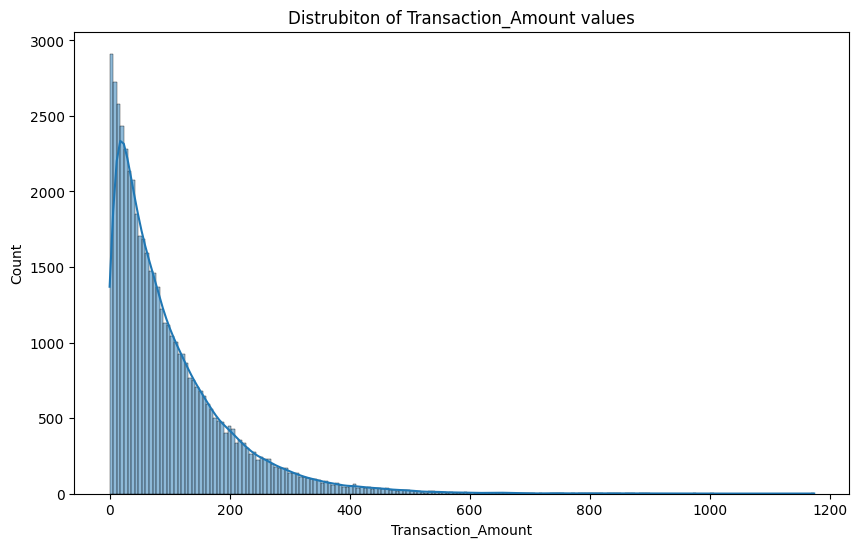

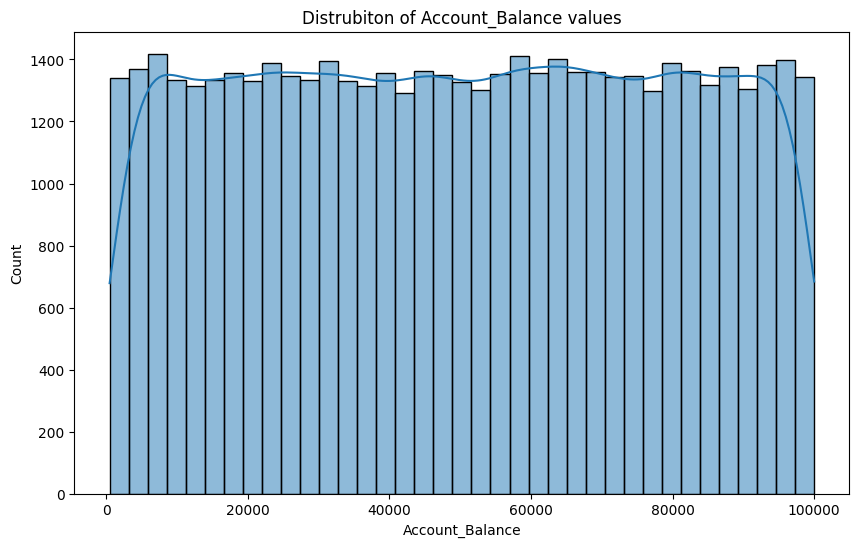

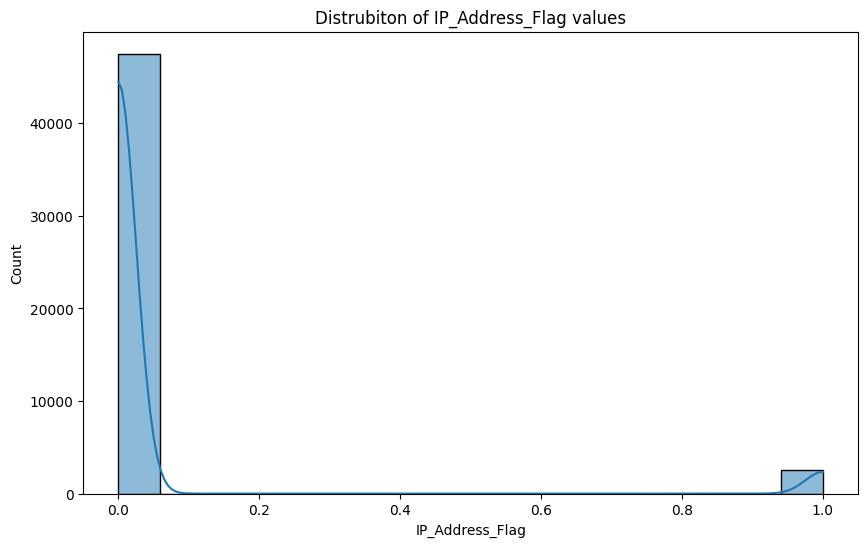

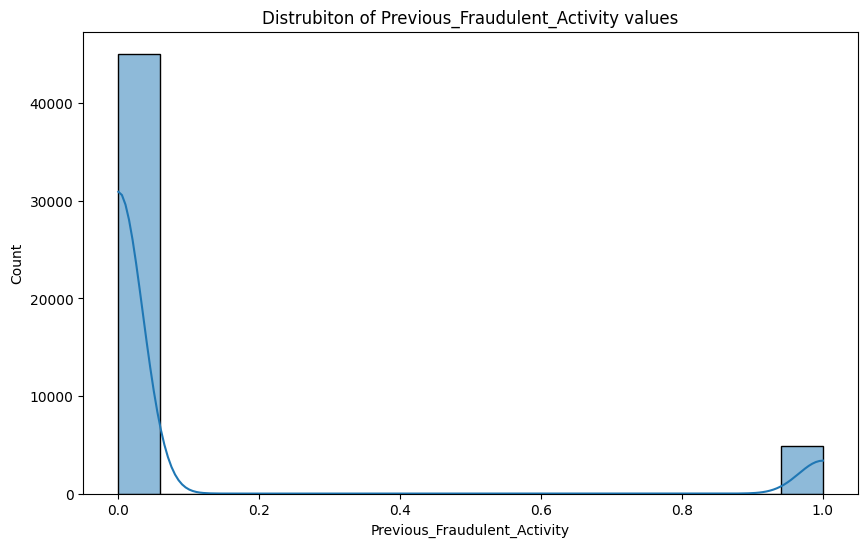

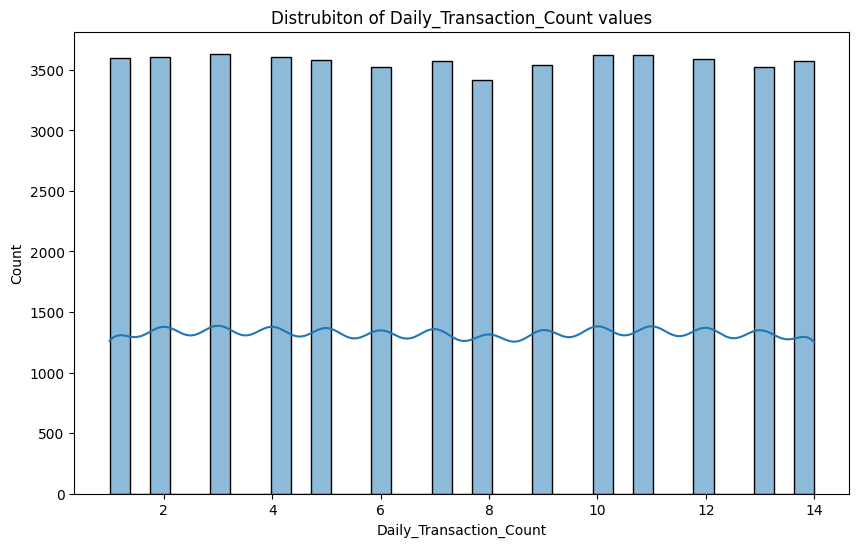

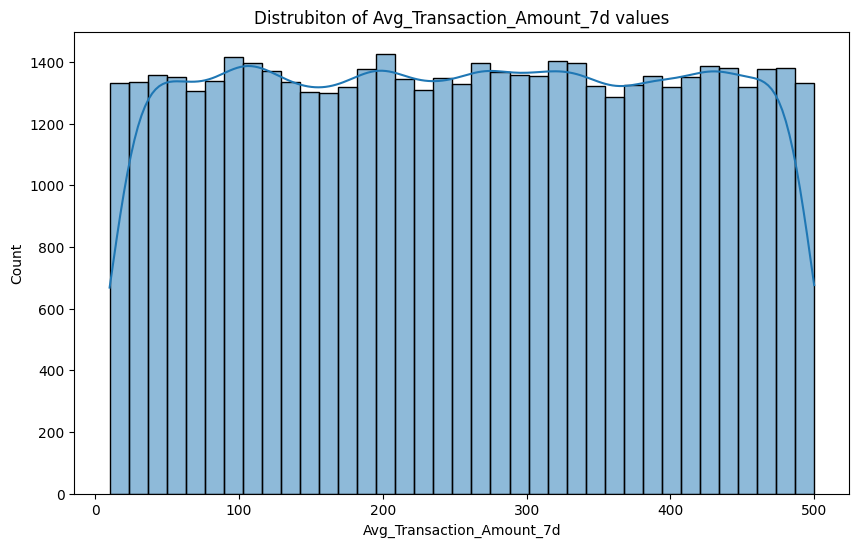

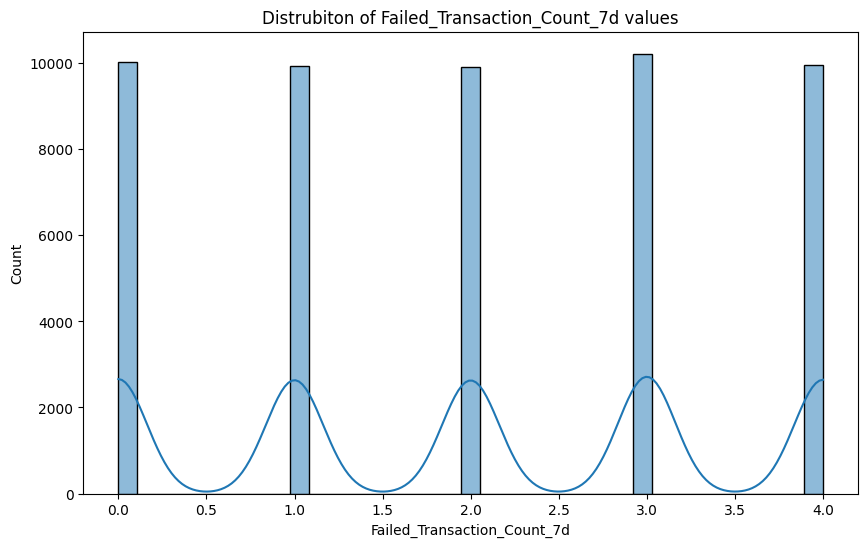

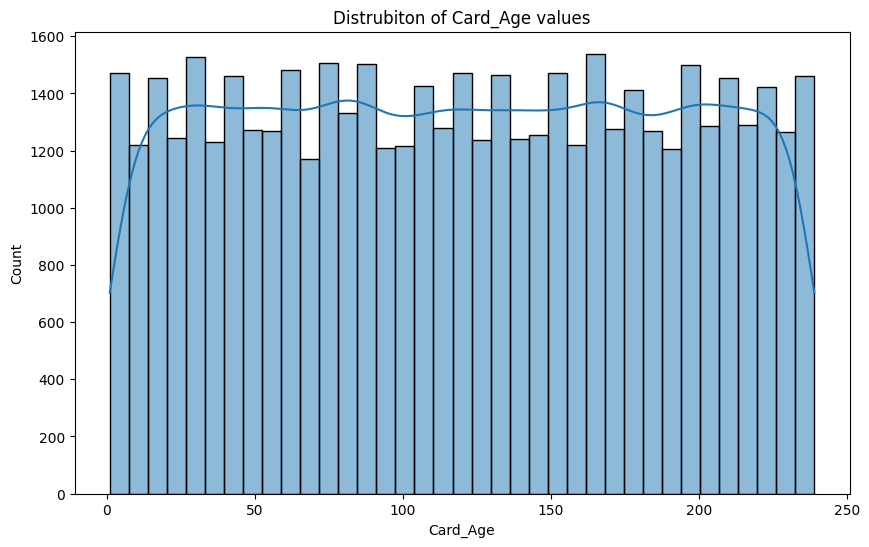

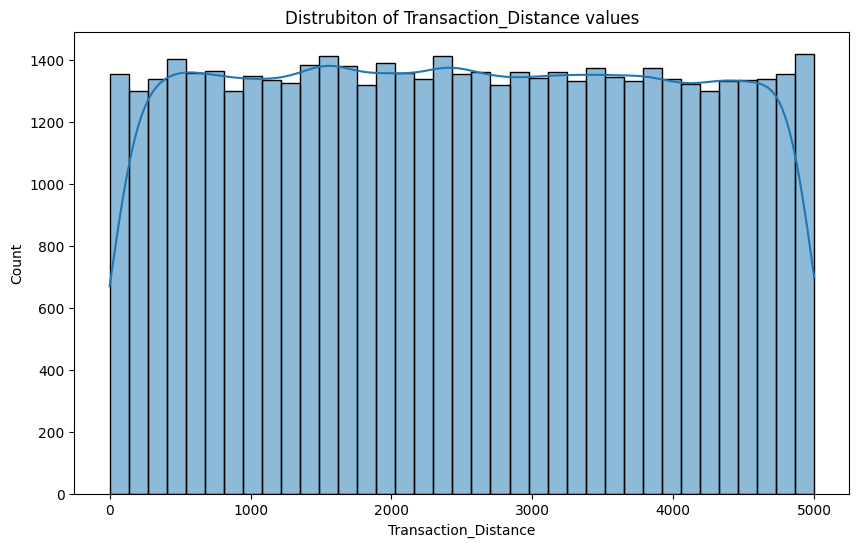

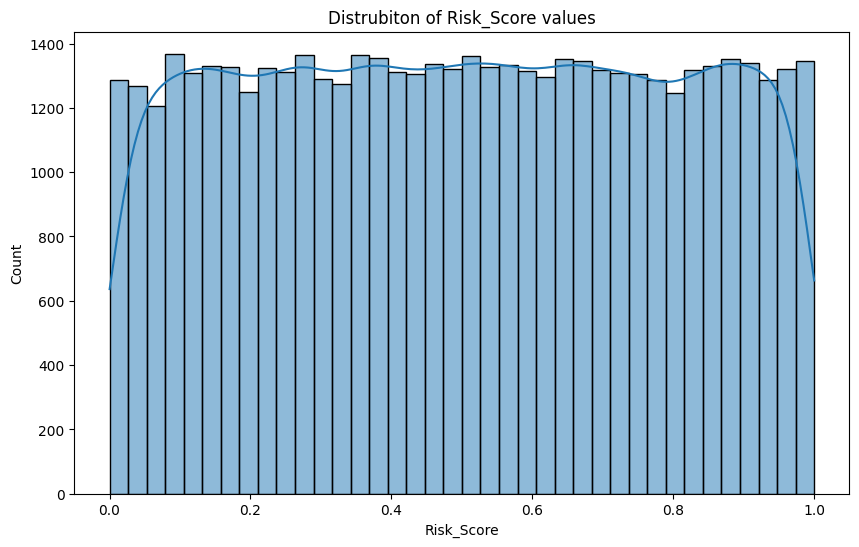

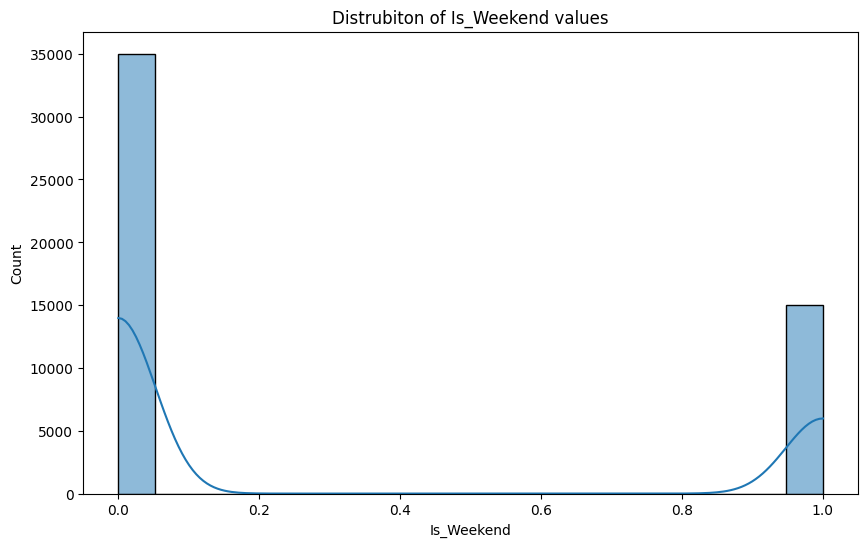

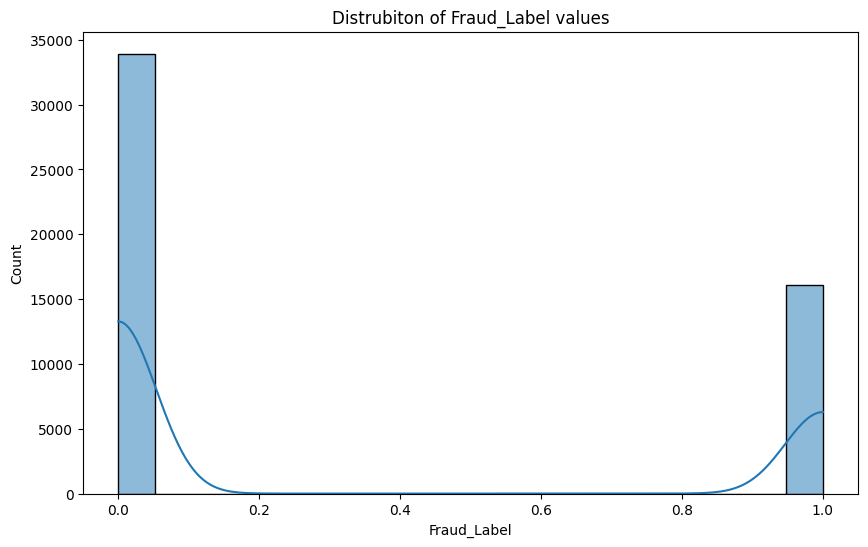

In [10]:
for col in df_numeric:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distrubiton of {col} values")
    plt.show()

In [11]:
numeric_categorized_col = [col for col in df_numeric.columns if len(df[col].unique()) < 10]
numeric_categorized_col

['IP_Address_Flag',
 'Previous_Fraudulent_Activity',
 'Failed_Transaction_Count_7d',
 'Is_Weekend',
 'Fraud_Label']

In [12]:
unique_str_cols

['Transaction_Type',
 'Device_Type',
 'Location',
 'Merchant_Category',
 'Card_Type',
 'Authentication_Method']

In [13]:
from IPython.display import display

for col in unique_str_cols:
    grouped = df.groupby(col)["Fraud_Label"].agg(["mean", "count"]).sort_values(by="mean", ascending=False)
    print(f"Grouping by: {col}")
    display(grouped)


Grouping by: Transaction_Type


,mean,count
Transaction_Type,,
ATM Withdrawal,0.324902,12453
Online,0.321298,12546
Bank Transfer,0.320832,12452
POS,0.318352,12549


Grouping by: Device_Type


,mean,count
Device_Type,,
Tablet,0.325645,16779
Laptop,0.319522,16581
Mobile,0.318810,16640


Grouping by: Location


,mean,count
Location,,
New York,0.324861,9915
Tokyo,0.324745,10208
Sydney,0.321393,9938
London,0.319859,9945
Mumbai,0.315789,9994


Grouping by: Merchant_Category


,mean,count
Merchant_Category,,
Restaurants,0.326283,9976
Travel,0.323015,10015
Groceries,0.321090,10019
Electronics,0.319273,9957
Clothing,0.317054,10033


Grouping by: Card_Type


,mean,count
Card_Type,,
Discover,0.324951,12328
Amex,0.323778,12419
Visa,0.318631,12560
Mastercard,0.318128,12693


Grouping by: Authentication_Method


,mean,count
Authentication_Method,,
OTP,0.325166,12366
Password,0.323513,12457
Biometric,0.320705,12591
PIN,0.316065,12586


In [14]:
from sklearn.preprocessing import LabelEncoder

for col in unique_str_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,3,93213.17,0,3,4,0,0,7,437.63,3,0,65,883.17,0,0.8494,0,0
1,1.19,1,75725.25,1,2,0,0,0,13,478.76,4,2,186,2203.36,3,0.0959,0,1
2,28.96,2,1588.96,2,1,3,0,0,14,50.01,4,3,226,1909.29,0,0.8400,0,1
3,254.32,0,76807.20,2,2,0,0,0,8,182.48,4,3,76,1311.86,1,0.7935,0,1
4,31.28,3,92354.66,1,1,1,0,1,14,328.69,4,2,140,966.98,3,0.3819,1,1


In [15]:
categorized_col = numeric_categorized_col + unique_str_cols
categorized_col

['IP_Address_Flag',
 'Previous_Fraudulent_Activity',
 'Failed_Transaction_Count_7d',
 'Is_Weekend',
 'Fraud_Label',
 'Transaction_Type',
 'Device_Type',
 'Location',
 'Merchant_Category',
 'Card_Type',
 'Authentication_Method']

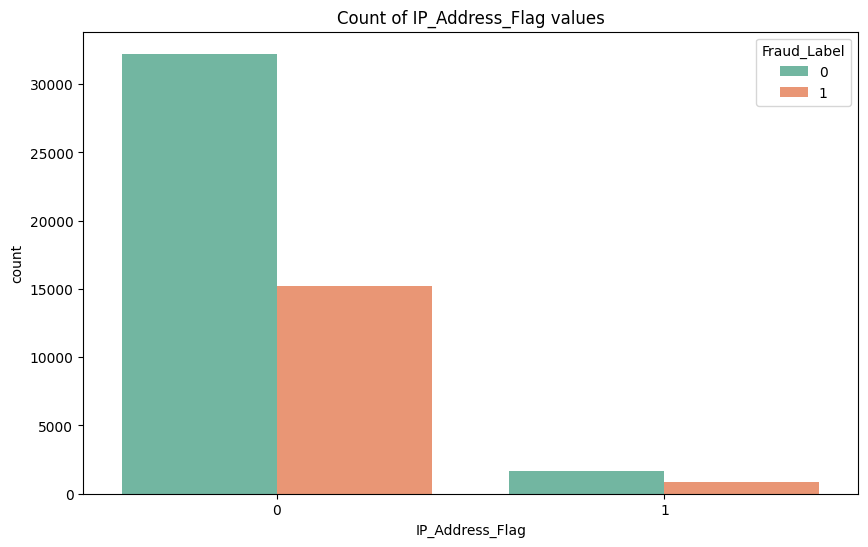

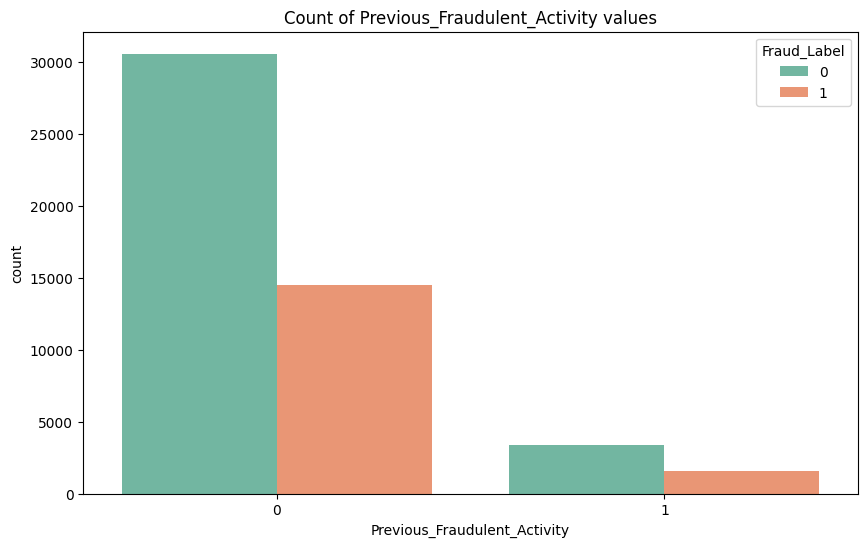

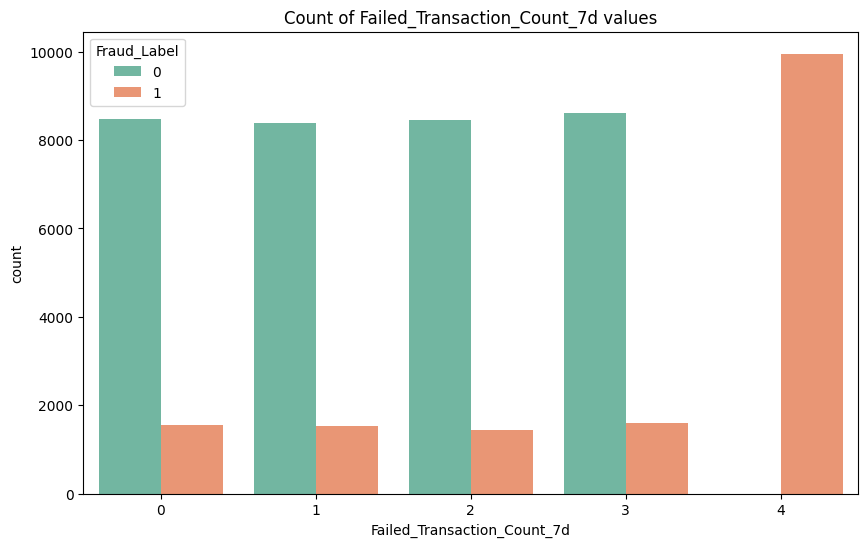

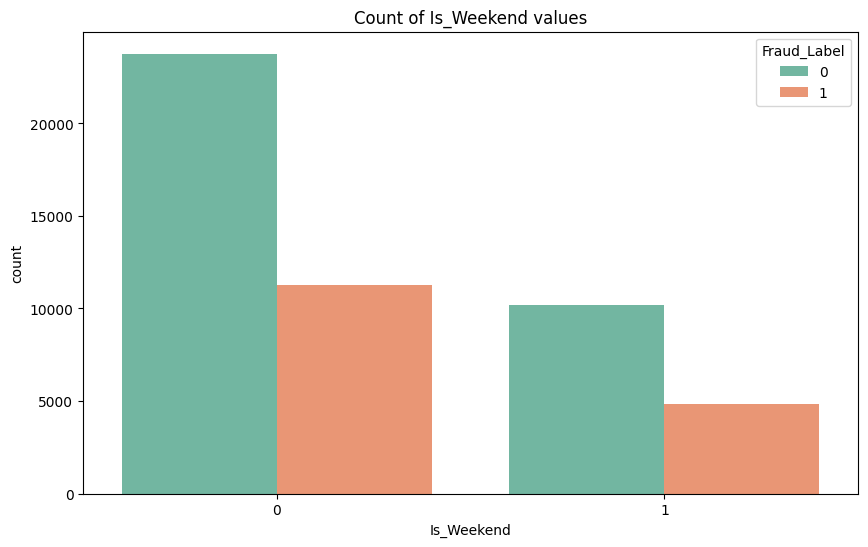

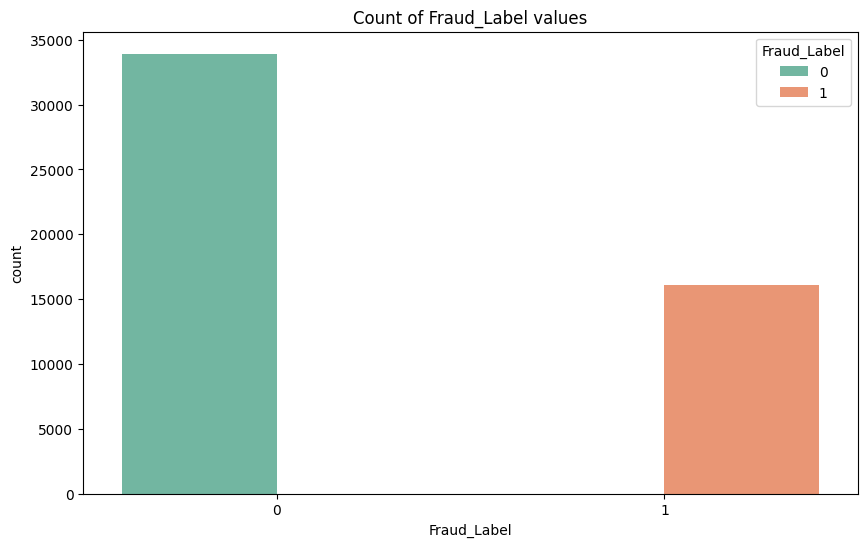

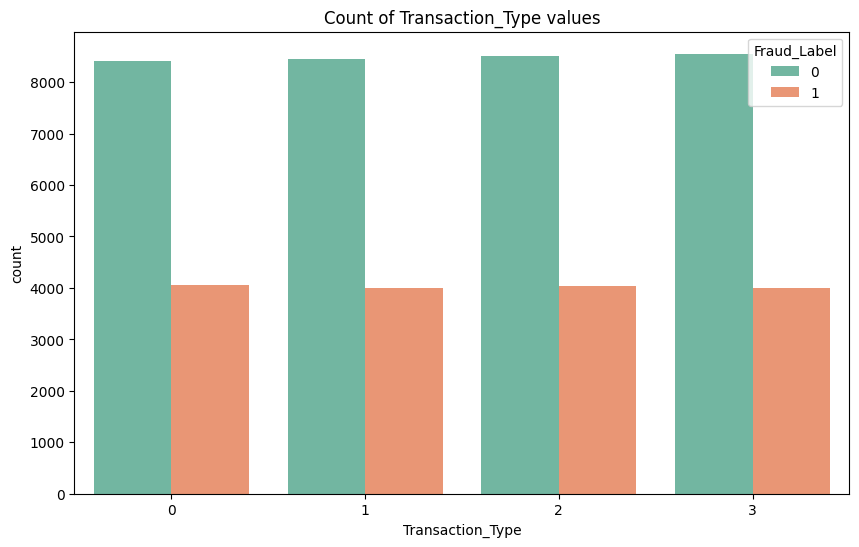

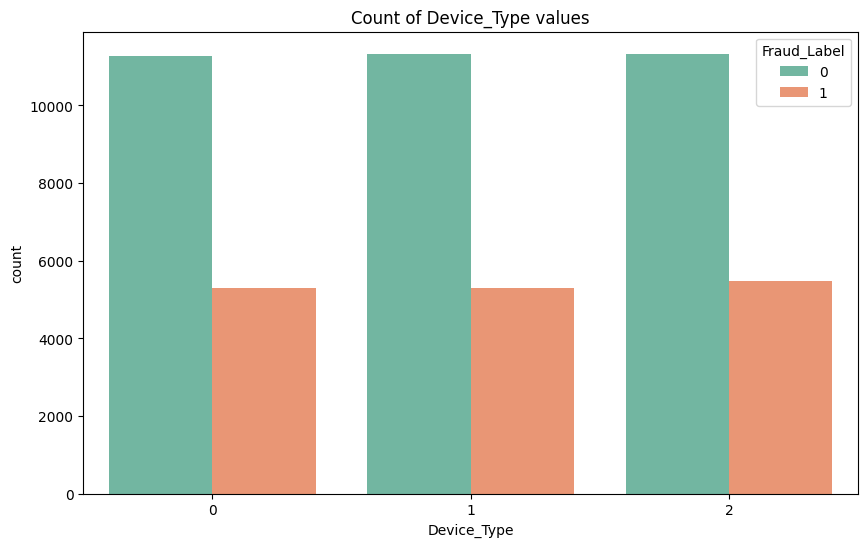

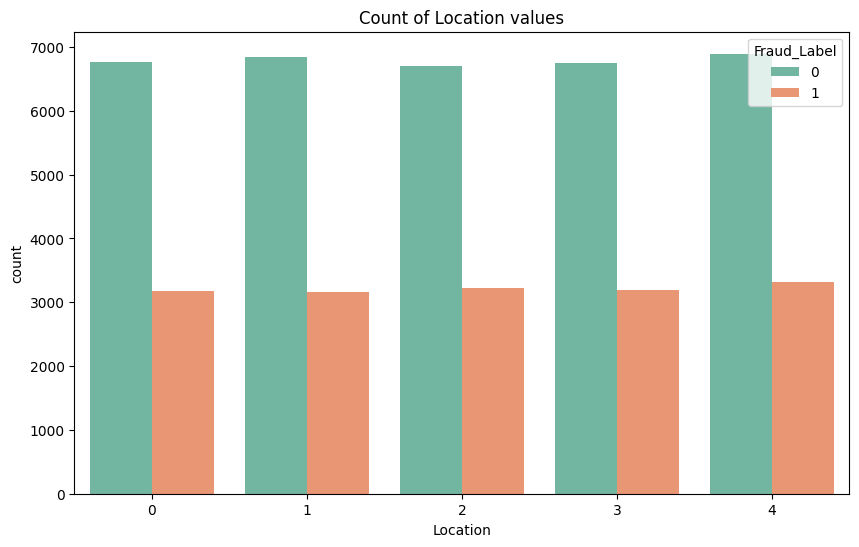

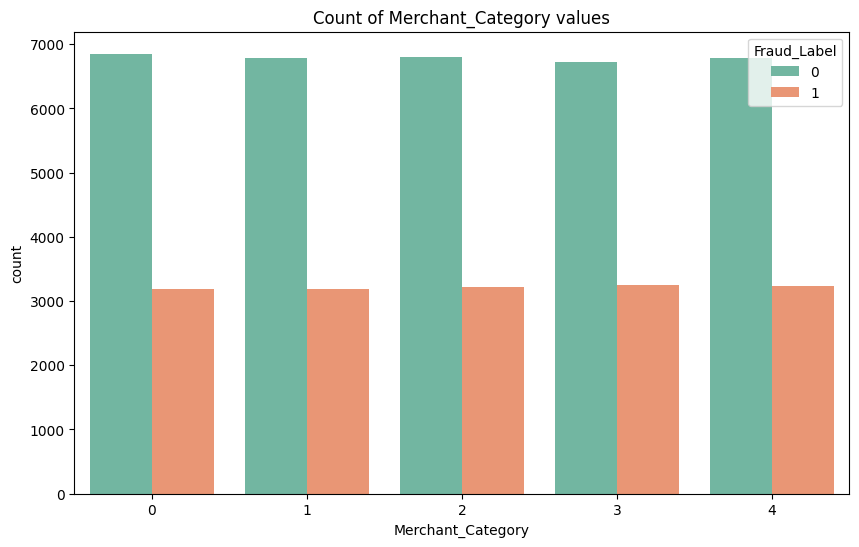

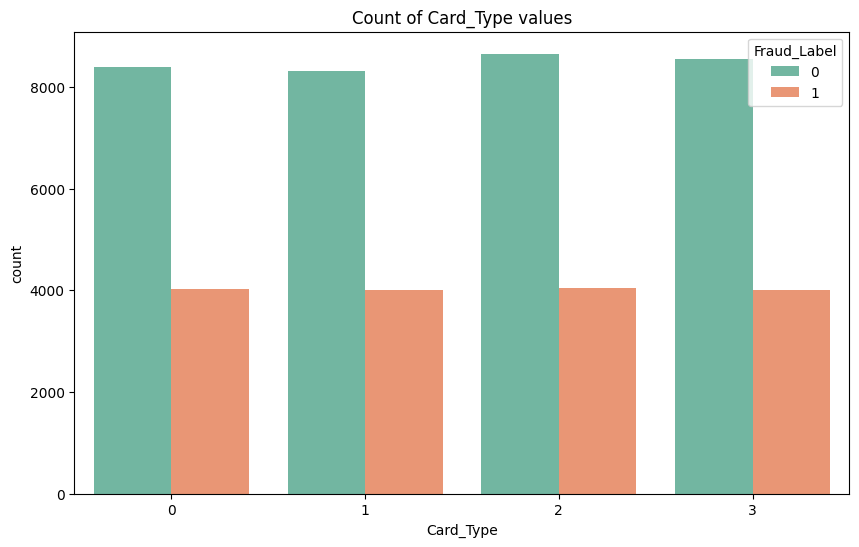

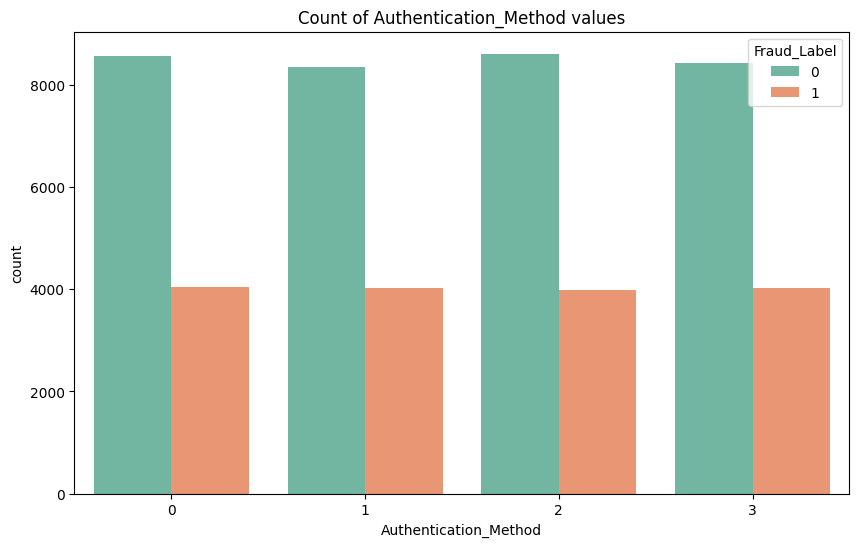

In [ ]:
import seaborn as sns

for col in categorized_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, hue="Fraud_Label", palette="Set2")
    plt.title(f"Count of {col} values")
    plt.show()

In [17]:
numeric_features = [col for col in df.columns if col not in categorized_col]
numeric_features

['Transaction_Amount',
 'Account_Balance',
 'Daily_Transaction_Count',
 'Avg_Transaction_Amount_7d',
 'Card_Age',
 'Transaction_Distance',
 'Risk_Score']

## Predictive Power of Cont. Values

In [18]:
categorized_col.remove("Fraud_Label")

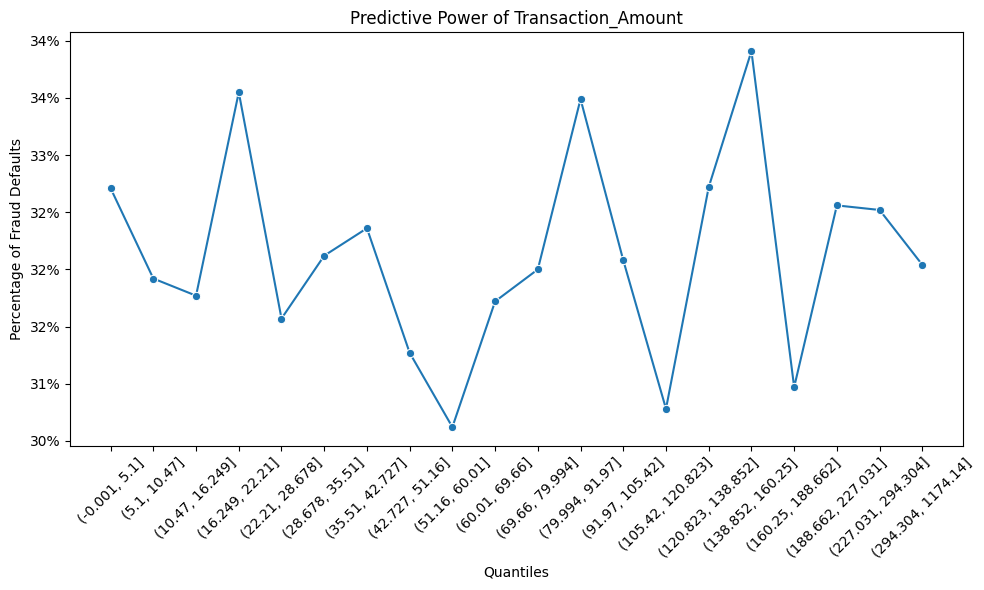

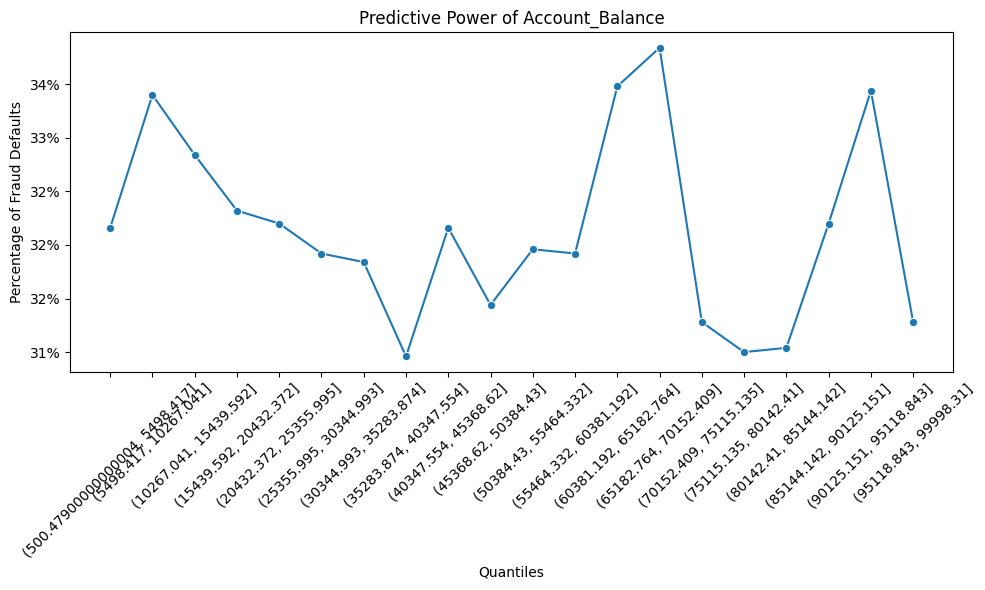

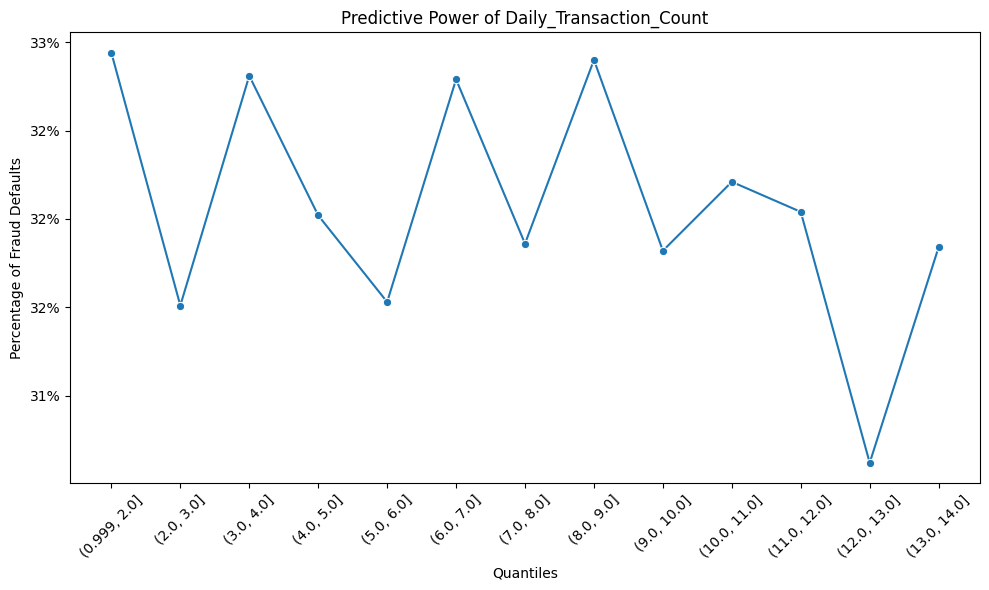

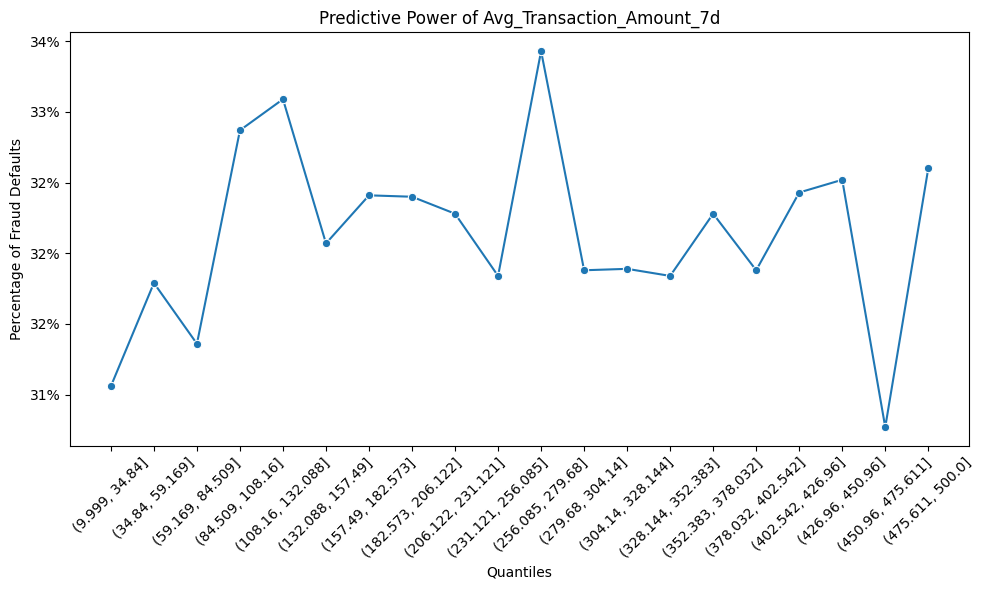

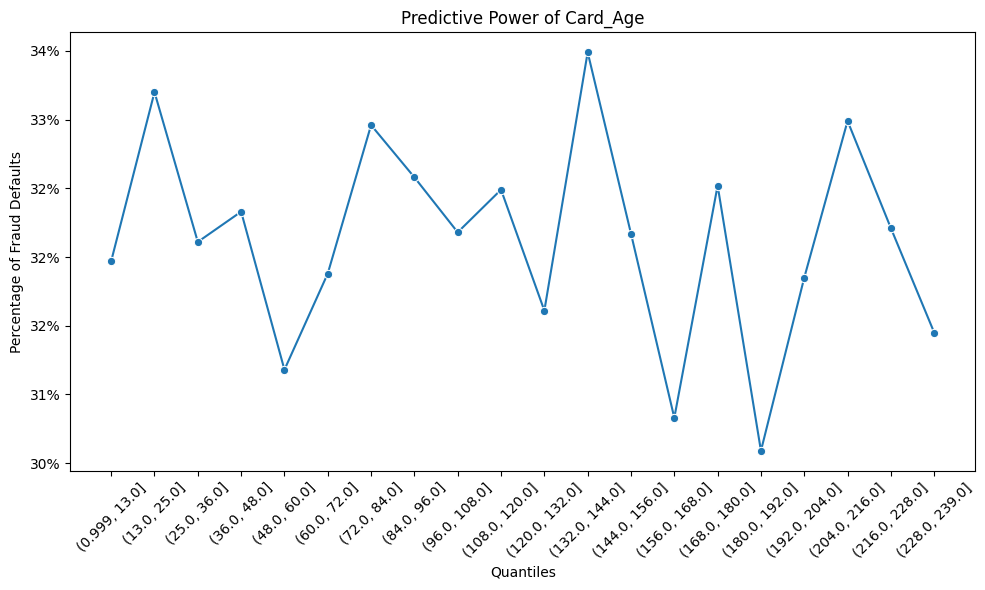

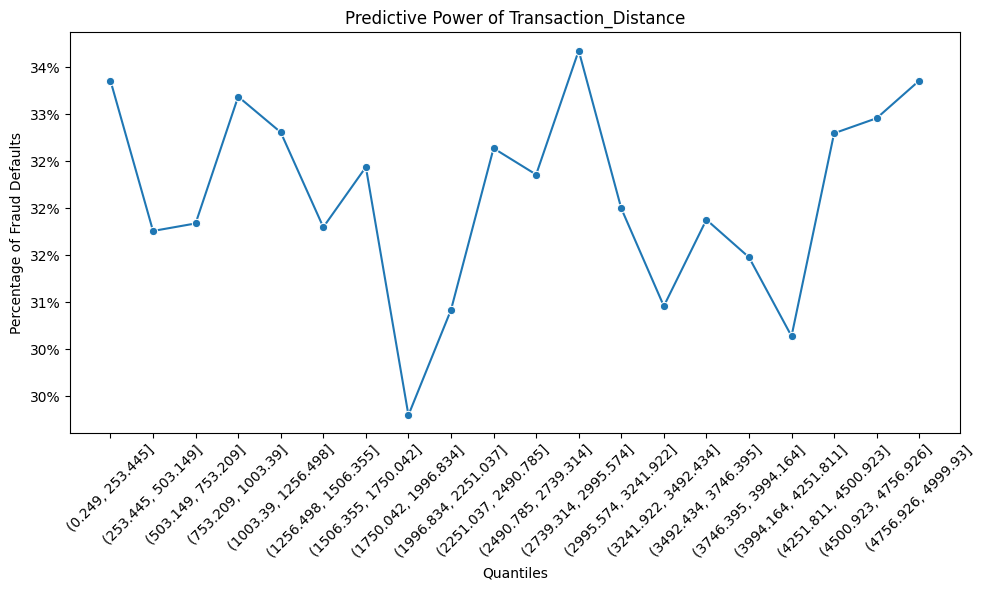

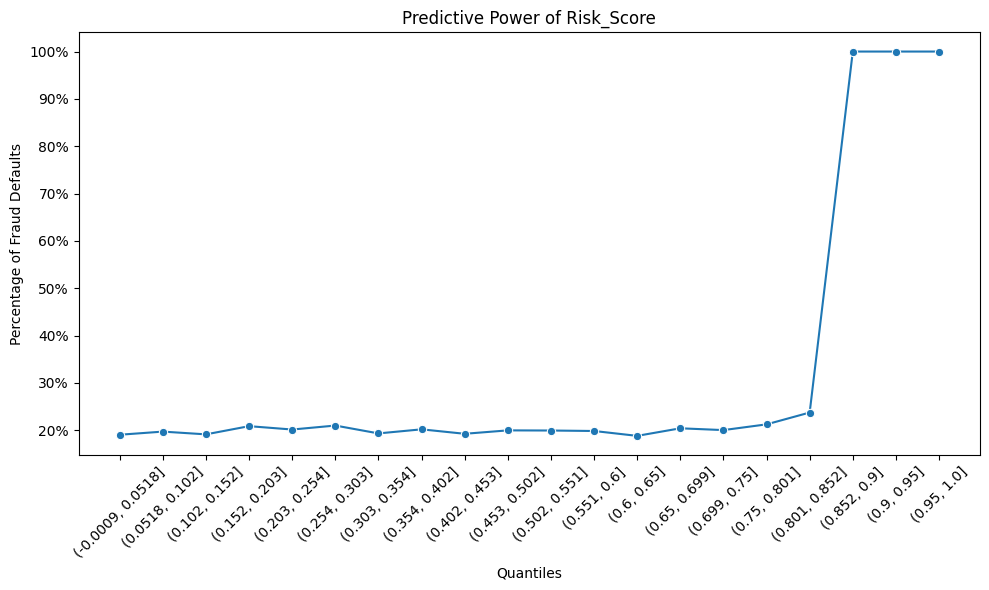

In [19]:
for col in numeric_features:
    plot_feature_predictive_power(df, col, "Fraud_Label", n_quantiles=20, categorical=False)

## Categorical Values Predictive Power

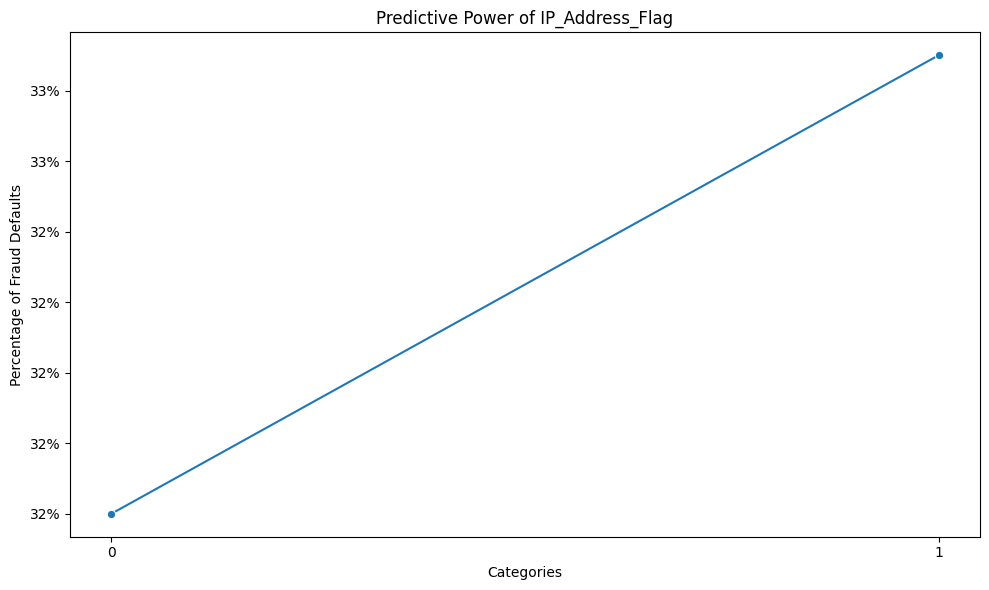

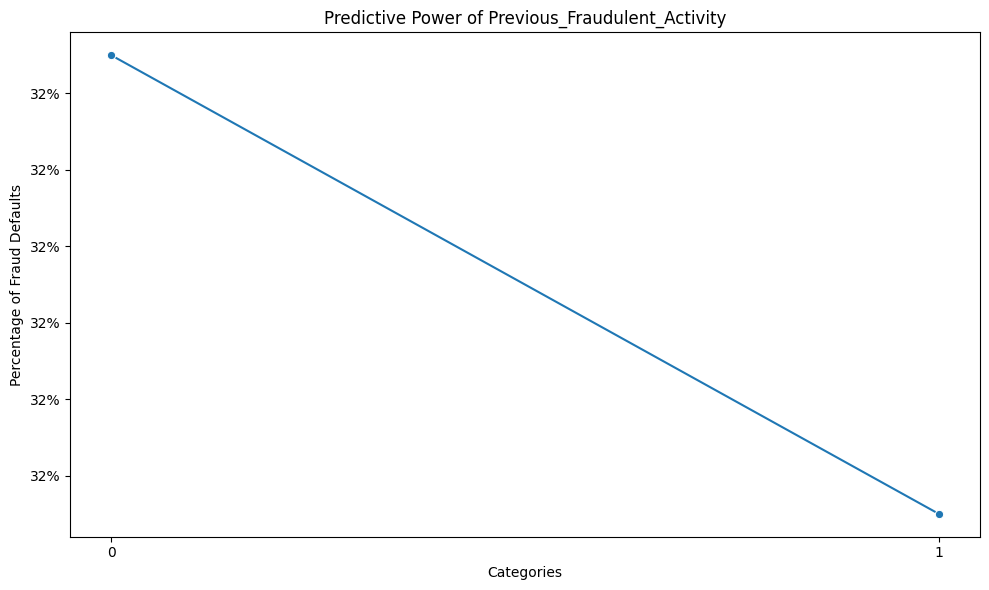

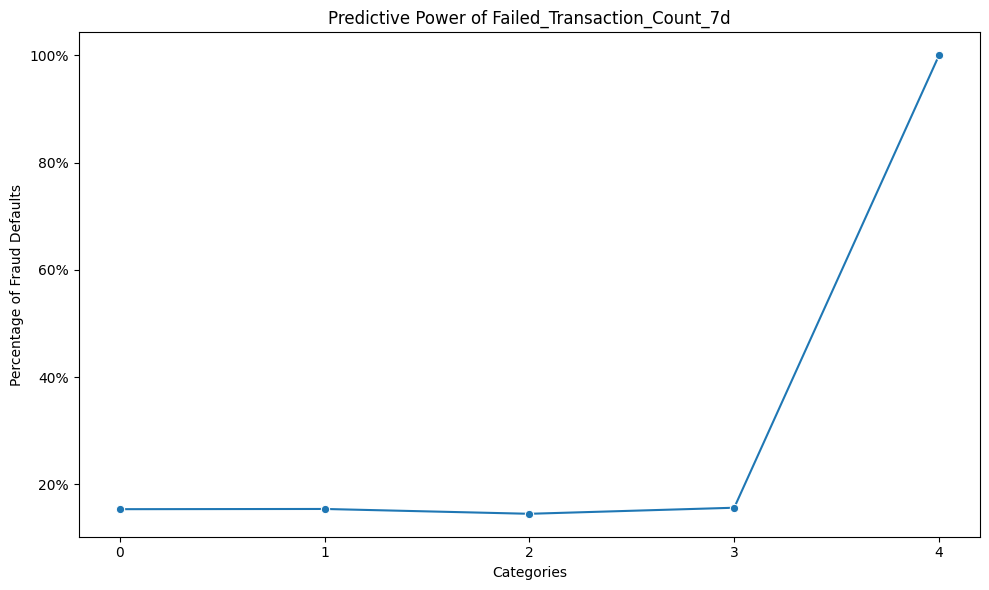

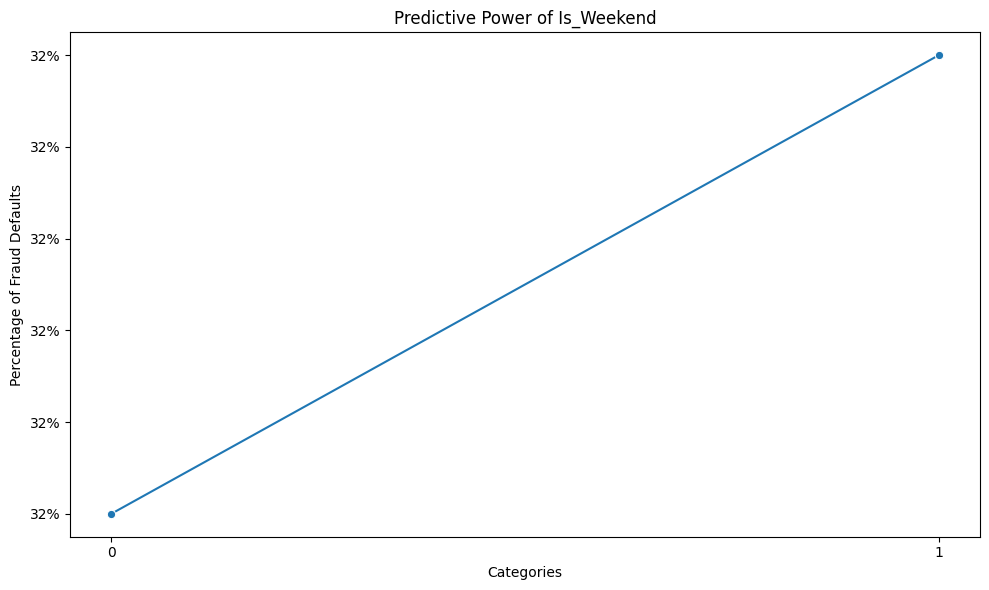

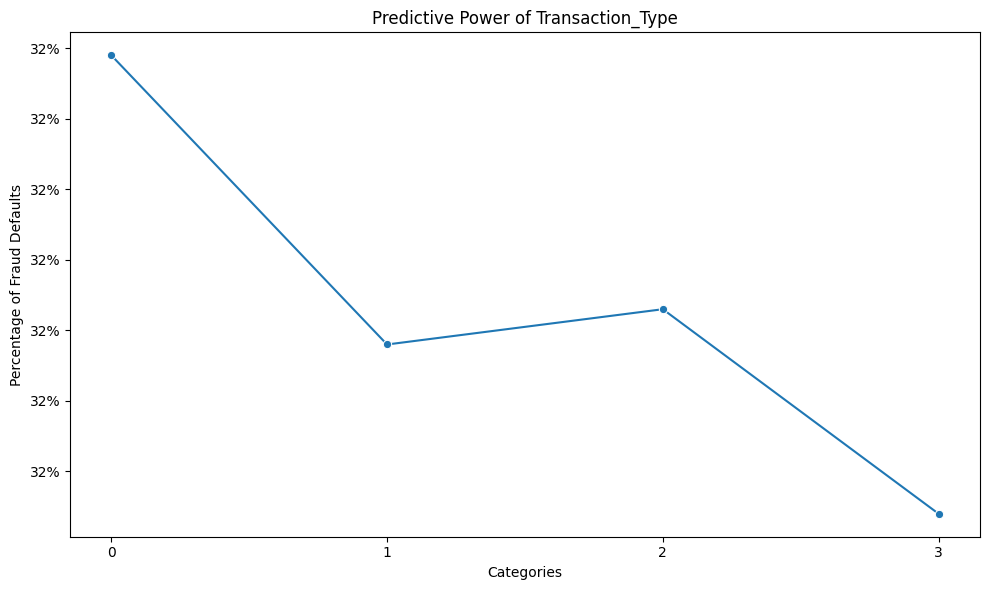

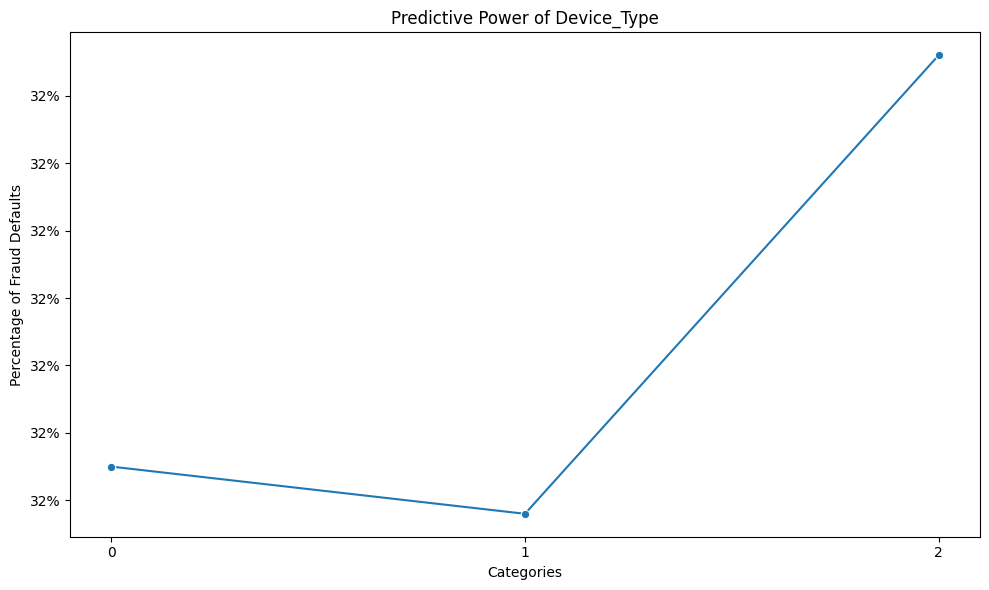

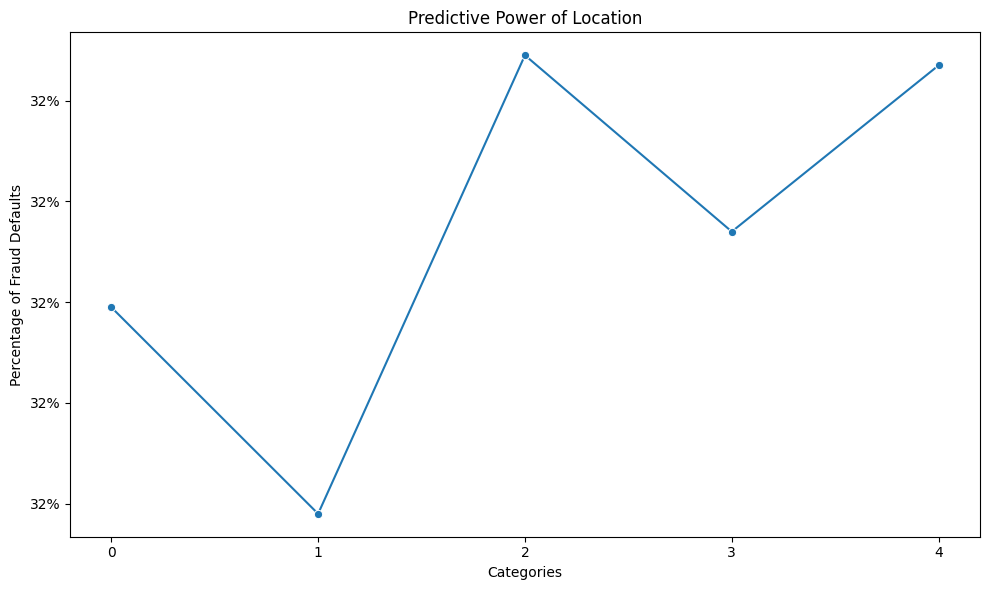

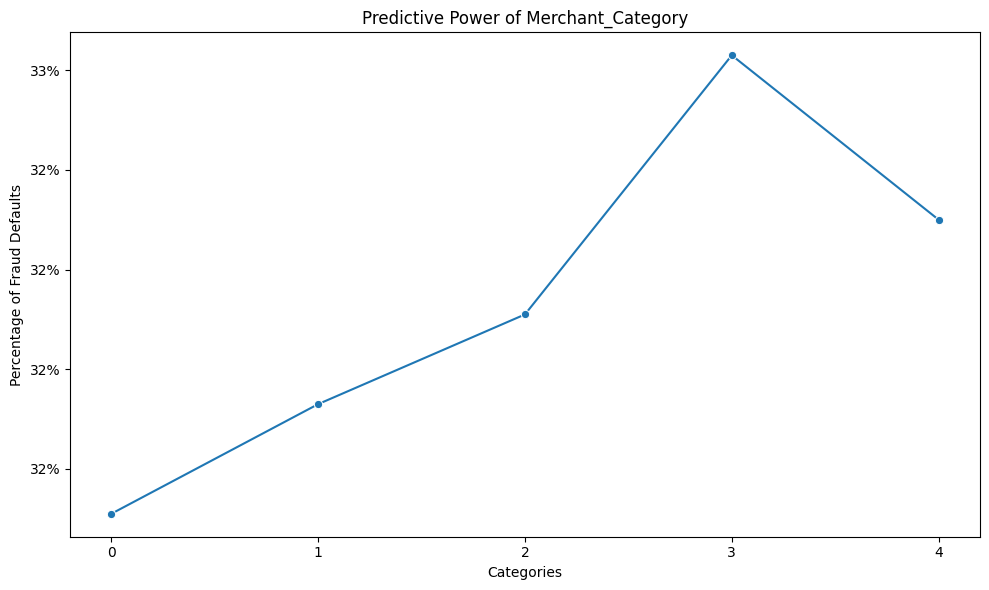

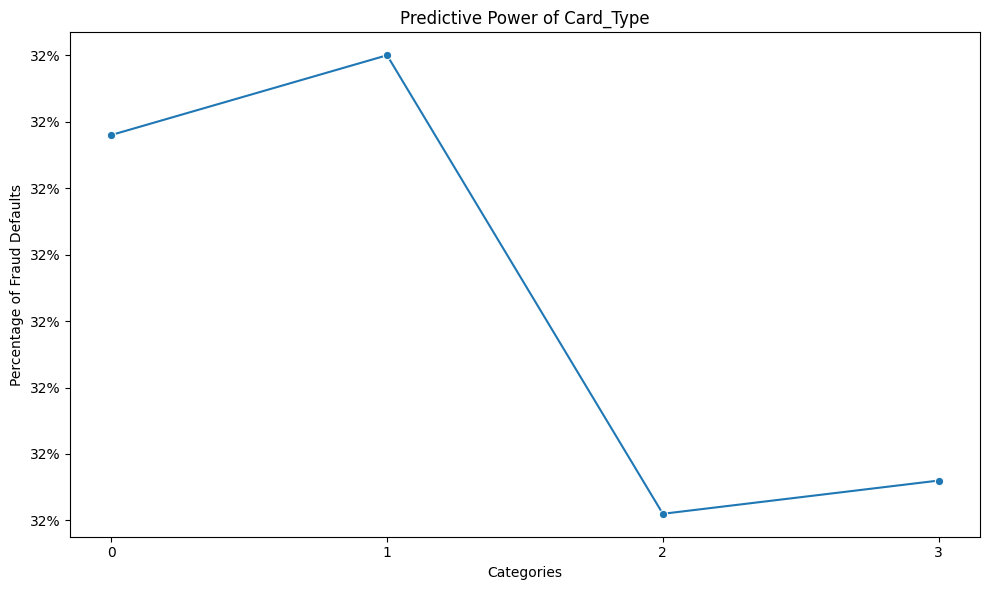

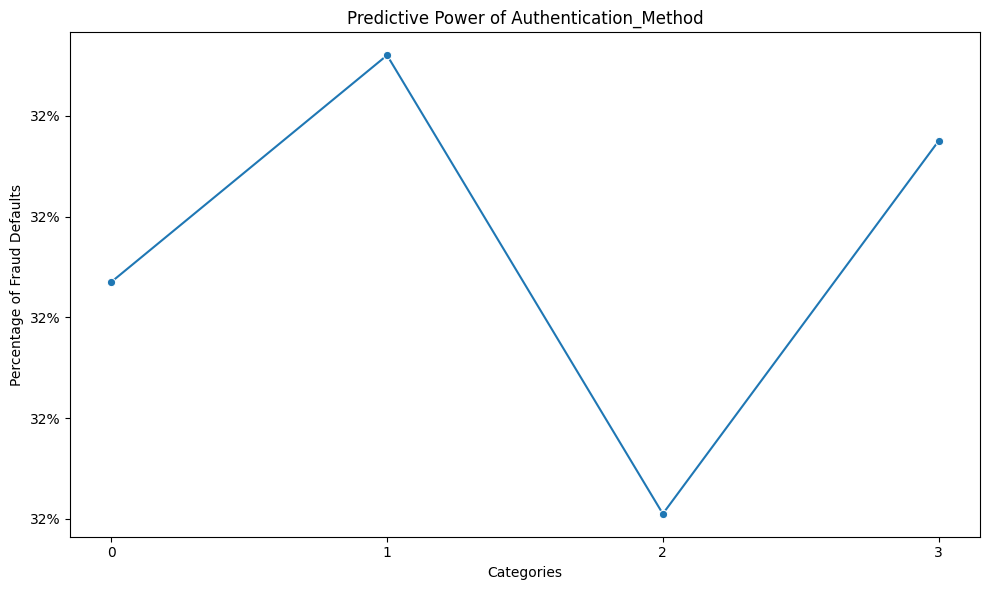

In [20]:
for col in categorized_col:
    plot_feature_predictive_power(df, col, "Fraud_Label", n_quantiles=20, categorical=True)

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_feat = {}

for col in df.columns:
    if col != "Fraud_Label":
        roc_auc_feat[col] = round(roc_auc_score(df["Fraud_Label"], df[col]),2)

In [22]:
roc_auc_feat

{'Transaction_Amount': 0.5,
 'Transaction_Type': 0.5,
 'Account_Balance': 0.5,
 'Device_Type': 0.5,
 'Location': 0.5,
 'Merchant_Category': 0.5,
 'IP_Address_Flag': 0.5,
 'Previous_Fraudulent_Activity': 0.5,
 'Daily_Transaction_Count': 0.5,
 'Avg_Transaction_Amount_7d': 0.5,
 'Failed_Transaction_Count_7d': 0.81,
 'Card_Type': 0.5,
 'Card_Age': 0.5,
 'Transaction_Distance': 0.5,
 'Authentication_Method': 0.5,
 'Risk_Score': 0.74,
 'Is_Weekend': 0.5}

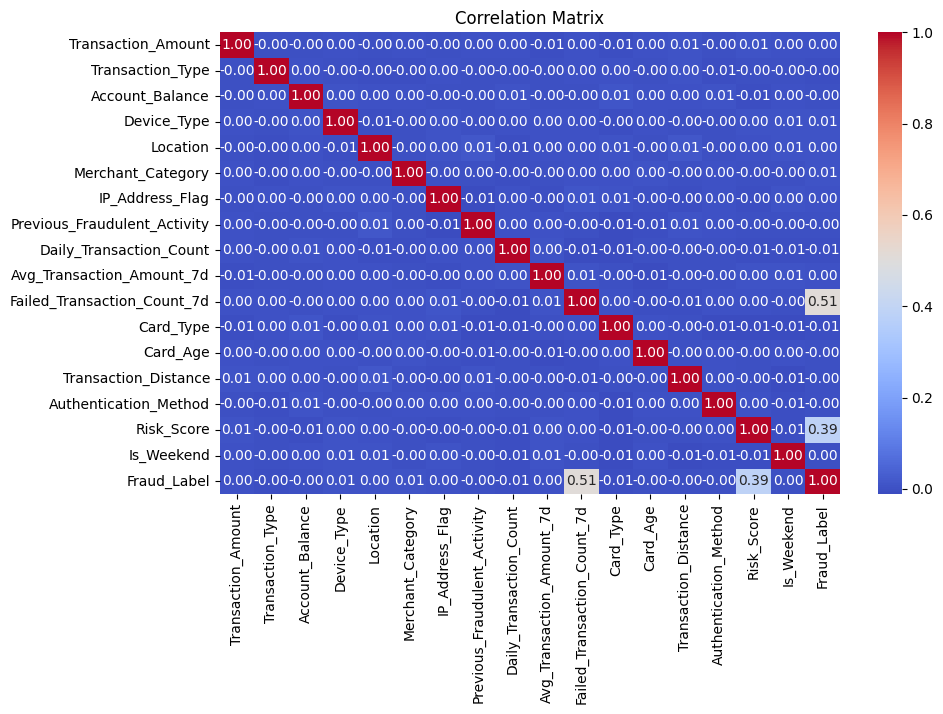

In [23]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

X = df.drop("Fraud_Label", axis=1)
y = df["Fraud_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False)

scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")


Cross Validation Scores: [0.999875 0.998375 0.99825  0.99975  0.999875]
Mean Accuracy: 0.999225
Standard Deviation: 0.0007474958193862968


In [25]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [26]:
score = xgb_model.score(X_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.9988


## Fine Tuning the model


In [27]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],          
    'reg_alpha': [0,0.1],      
    'reg_lambda': [1, 1.5]     
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,             
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)
print("Best Parameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[0]	validation_0-logloss:0.53573
[1]	validation_0-logloss:0.46255
[2]	validation_0-logloss:0.40318
[3]	validation_0-logloss:0.38591
[4]	validation_0-logloss:0.37168
[5]	validation_0-logloss:0.35983
[6]	validation_0-logloss:0.31655
[0]	validation_0-logloss:0.58132
[7]	validation_0-logloss:0.29484
[0]	validation_0-logloss:0.53543
[1]	validation_0-logloss:0.53879
[8]	validation_0-logloss:0.26132
[9]	validation_0-logloss:0.23236
[1]	validation_0-logloss:0.46206
[2]	validation_0-logloss:0.50086
[10]	validation_0-logloss:0.21904
[2]	validation_0-logloss:0.40252
[3]	validation_0-logloss:0.46674
[0]	validation_0-logloss:0.53583
[3]	validation_0-logloss:0.38522
[11]	validation_0-logloss:0.21206
[4]	validation_0-logloss:0.43582
[5]	validation_0-logloss:0.40767
[6]	validation_0-logloss:0.38191
[1]	validation_0-logloss:0.46278
[4]	validation_0-logloss:0.37092
[12]	validation_0-logloss:0.20607
[7]	validation_0-logloss:0.35825
[8]	valida

In [28]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


[0]	validation_0-auc:1.00000
[1]	validation_0-auc:1.00000
[2]	validation_0-auc:1.00000
[3]	validation_0-auc:1.00000
[4]	validation_0-auc:1.00000
[5]	validation_0-auc:1.00000
[6]	validation_0-auc:1.00000
[7]	validation_0-auc:1.00000
[8]	validation_0-auc:1.00000
[9]	validation_0-auc:1.00000
[10]	validation_0-auc:1.00000
[11]	validation_0-auc:1.00000
[12]	validation_0-auc:1.00000
[13]	validation_0-auc:1.00000
[14]	validation_0-auc:1.00000
[15]	validation_0-auc:1.00000
[16]	validation_0-auc:1.00000
[17]	validation_0-auc:1.00000
[18]	validation_0-auc:1.00000
[19]	validation_0-auc:1.00000
[20]	validation_0-auc:1.00000
[21]	validation_0-auc:1.00000
[22]	validation_0-auc:1.00000
[23]	validation_0-auc:1.00000
[24]	validation_0-auc:1.00000
[25]	validation_0-auc:1.00000
[26]	validation_0-auc:1.00000
[27]	validation_0-auc:1.00000
[28]	validation_0-auc:1.00000
[29]	validation_0-auc:1.00000
[30]	validation_0-auc:1.00000
[31]	validation_0-auc:1.00000
[32]	validation_0-auc:1.00000
[33]	validation_0-au

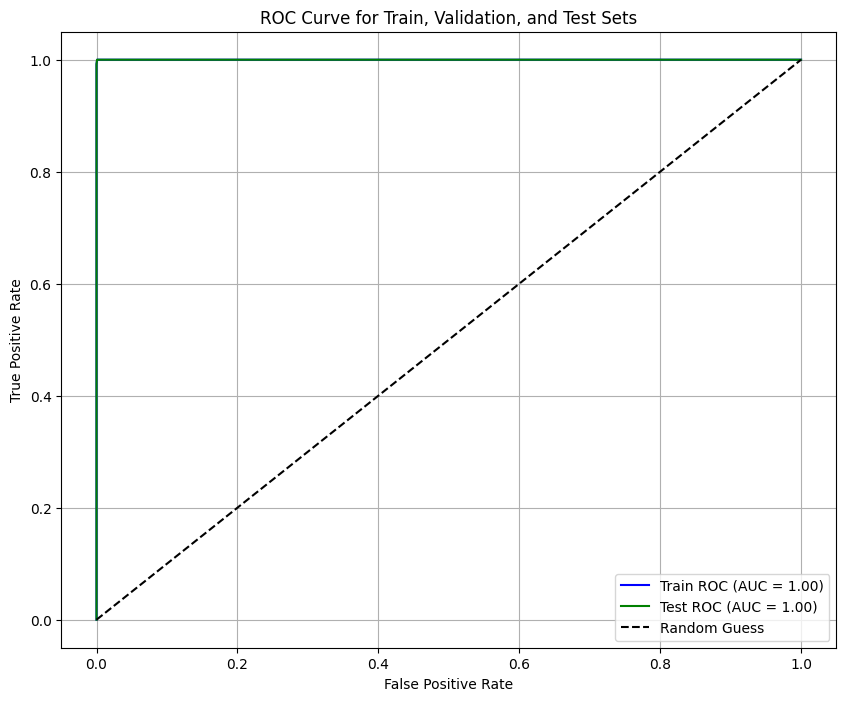

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize and train the final model with best parameters
final_model = xgb.XGBClassifier(
    **best_params,  # Parameters to avoid overfitting
    n_estimators=50,  # Keep the n_estimators setting
    objective="binary:logistic",
    random_state=42,
    eval_metric="auc"
)

# Fit the model
final_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Predict probabilities for train, validation, and test sets
y_train_proba = final_model.predict_proba(X_train)[:, 1]

y_test_proba = final_model.predict_proba(X_test)[:, 1]

# Calculate ROC Curve and AUC for train set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
auc_train = roc_auc_score(y_train, y_train_proba)


# Calculate ROC Curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train, Validation, and Test Sets')
plt.legend(loc='best')
plt.grid()
plt.show()


In [30]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = final_model.predict(X_test)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)




Precision: 0.9984567901234568
Recall: 1.0


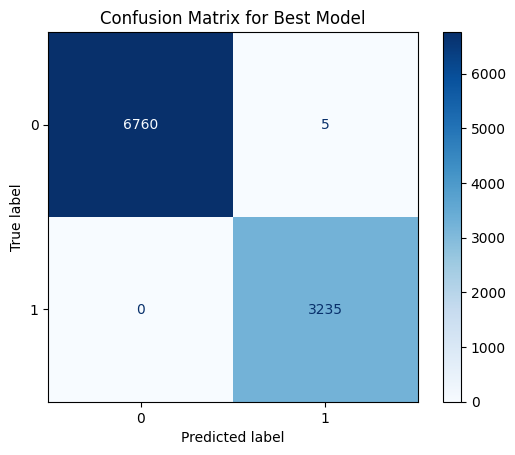

In [31]:
from sklearn.metrics import  ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.show()

In [32]:
feature_importances_final_model = pd.DataFrame(final_model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)*100

<Axes: xlabel='importance'>

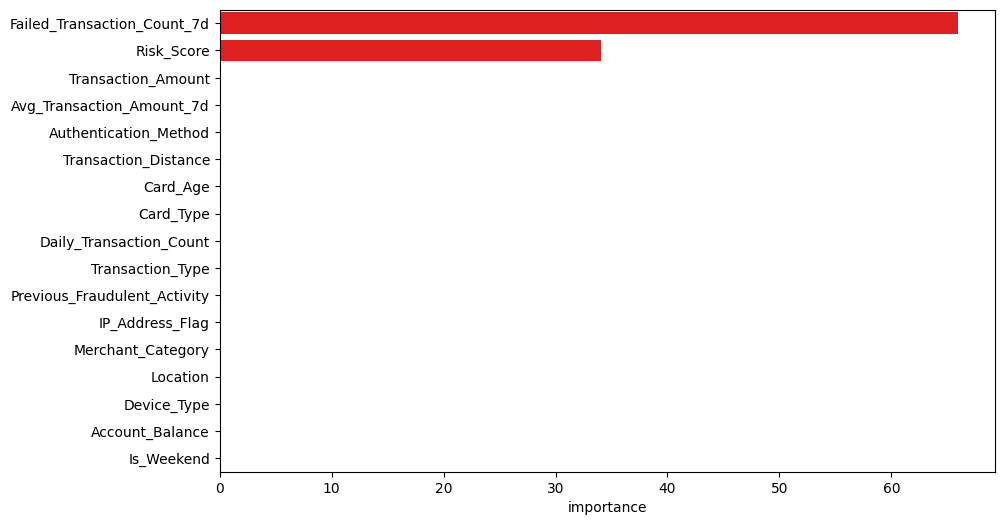

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_final_model.importance, y=feature_importances_final_model.index, color="red")

In [34]:
X_light = X[feature_importances_final_model.index[:2]]
X_light.head()

,Failed_Transaction_Count_7d,Risk_Score
0,3,0.8494
1,4,0.0959
2,4,0.8400
3,4,0.7935
4,4,0.3819


In [35]:
X_light_train, X_light_test, y_light_train, y_light_test = train_test_split(X_light, y, test_size=0.2, random_state=42)

xgb_model_light = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False)

xgb_model_light.fit(X_light_train, y_light_train)

score_light = xgb_model_light.score(X_light_test, y_light_test)
print(f"Accuracy: {score_light}")



Accuracy: 0.9995
